In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random

In [2]:
df = pd.read_table('AmesHousing_1.txt',sep="\t")

In [3]:
df['SalePrice'].mean()

180796.0600682594

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.columns[df.columns.str.contains(r'Year')]

Index(['Year Built', 'Year Remod/Add'], dtype='object')

In [6]:
df.groupby(['Year Built'])['SalePrice'].agg(['mean','count'])

,mean,count
Year Built,,
1872,122000.000000,1
1875,94000.000000,1
1879,185000.000000,1
1880,186695.800000,5
1882,168000.000000,1
...,...,...
2006,259623.847826,138
2007,265924.935780,109
2008,314300.224490,49


In [7]:
data_dct = [
    {'year':2006,'mean':181761.648000,'sold':625},
    {'year':2007,'mean':185138.207493,'sold':694},
    {'year':2008,'mean':178841.750804,'sold':622},
    {'year':2009,'mean':181404.567901,'sold':648},
    {'year':2010,'mean':172597.598240,'sold':341}
           ]


In [8]:
houses_per_year = pd.DataFrame(data_dct)
houses_per_year.rename(columns={'year':'Year','mean':'Mean Price','sold':'Houses Sold'},inplace=True)
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [9]:
mean_new = houses_per_year['Mean Price'].mean()
mean_new

179948.7544876

In [10]:
mean_original = df['SalePrice'].mean()
mean_original

180796.0600682594

In [11]:
difference = mean_original - mean_new
difference

847.3055806593911

each year has a different number of sold houses, the mean of sale prices for each individual year weighs differently in the overall mean.

But when we computed the mean of the Mean Price column, we gave each year the same weight because we added all the five mean prices and then divided by 5.

> To understand why it's wrong to give each year an equal weight, let's begin thinking of the problem on a smaller scale.

<center>
$\large \bar{x}$ = $\large \frac{(28,700 + 142,500 + 440,000 + 336,860 + 207,500)+(135,000 + 139,000}{7}$
</center>
<br>
<center>
$\large \frac{\sum 2009 + \sum 2010}{7}$
</center>

In [12]:
two09 = np.array([28700,142500,440000,336860,207500]) # n = 5
two10 = np.array([135000,139000]) # 2
n = 7

In [13]:
np.concatenate([two09,two10]).sum()/n

204222.85714285713

<center>
2009 : $\large \bar{x}$ = $\large\frac{28,700 + 142,500 + 440,000 + 336,860 + 207,500}{5}$
</center>
<br>
<center>
2010 : $\large \bar{x}$ = $\large\frac{135,000 + 139,000}{2}$
</center>

In [14]:
np.sum(two09)/5

231112.0

In [15]:
np.sum(two10)/2

137000.0

In [16]:
((np.sum(two09)/5) + (np.sum(two10)/2))/2

184056.0

# To compute the correct overall mean, we need to:

In [17]:
weighted_mean = ((houses_per_year['Mean Price'] * houses_per_year['Houses Sold'])\
                 .sum())/houses_per_year['Houses Sold'].sum()

mean_original = df['SalePrice'].mean()

difference = mean_original - weighted_mean
difference

2.7997884899377823e-08

take into account the different weights and compute the mean like we did in the previous exercise, we call that mean the weighted mean. Just as the arithmetic mean we learned about in the previous mission, the weighted mean can be easily defined algebraically.

# Weighted Mean

$[x_1,x_2,...,x_n]$
<br><br>
$[w_1,w_2,...,w_2]$

$\large weighted mean = \frac{x_1w_1 + x_2w_2 + ... + x_nw_n}{w_1+w_2+...+w_n} = \frac {\sum_{i=1}^nx_iw_i}{\sum_{i=1}^nw_i}$

In [18]:
def weight_mean(mean_arr,weight_arr):
    N = weight_arr.sum()
    total = (mean_arr * weight_arr).sum()
    return total/N

In [19]:
weighted_mean_function = weight_mean(houses_per_year['Mean Price'],houses_per_year['Houses Sold'])

In [20]:
weight_mean_numpy = np.average(houses_per_year['Mean Price'],weights=houses_per_year['Houses Sold'])
weight_mean_numpy

180796.0600682314

In [21]:
equal = round(weighted_mean_function,10) == round(weight_mean_numpy,10)

In [22]:
equal

True

# Median  for Open Ended Distribution 

While learning about the weighted mean we saw that there are distributions where it's possible to compute the mean, although that wouldn't be correct. There are distributions, however, where it's impossible to compute the mean

In [23]:
df['TotRms AbvGrd'].value_counts() 
# 10 or more ,  open-ended distribution. , 
# lowest boundary is 2 
# upper boundary ?

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

In [24]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

In [25]:
median1 = 23
median2 = 55
median3 = 32

sorting a distribution in an ascending order and then choosing a middle value or two doesn't involve any arithmetic. The different treatment for odd and even-numbered distribution

In [26]:
df['TotRms AbvGrd']=df['TotRms AbvGrd'].str.replace('10 or more','10')

In [27]:
df['TotRms AbvGrd']=df['TotRms AbvGrd'].astype(int)

In [28]:
df['TotRms AbvGrd'].sort_values().median()

6.0

> The median is so resistant to changes in the data, it's classified as a **resistant** or **robust statistic**

> This property makes the median ideal for finding reasonable averages for distributions containing outliers. 

In [29]:
rate = np.array([2,3,5,5,10])
rate_high = np.array([2,3,5,5,1000])

In [30]:
print("No Outlier Mean: {}\nOutlier Mean: {}".format(rate.mean(),rate_high.mean()))

No Outlier Mean: 5.0
Outlier Mean: 203.0


In [31]:
print("No Outlier Mean: {}\nOutlier Mean: {}".format(np.median(rate),np.median(rate_high)))

No Outlier Mean: 5.0
Outlier Mean: 5.0


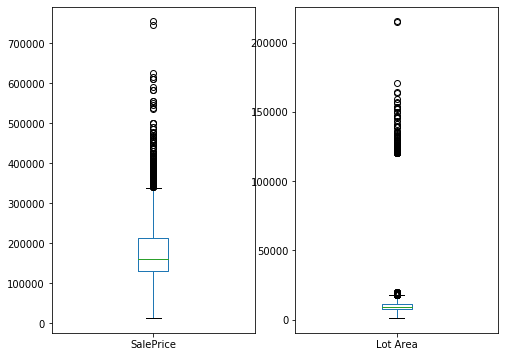

In [39]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
df['SalePrice'].plot.box()

plt.subplot(1,2,2)
df['Lot Area'].plot.box()

In [40]:
# Median on Ordinal scale

df['Overall Cond'].mean()

5.563139931740614

In [41]:
df['Overall Cond'].median()

5.0

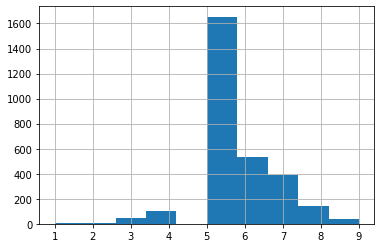

In [43]:
df['Overall Cond'].hist()